<a href="https://colab.research.google.com/github/Me-Vish/TASK1_AI_WEATHER_FORECASTING/blob/main/DAY5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Custom Synthetic Sentiment Dataset
data = {
    "text": [
        "This book is absolutely brilliant",
        "I really enjoyed the movie last night",
        "The service at the restaurant was fantastic",
        "I feel great after using this app",
        "What a delightful experience, highly recommend it",
        "This painting is mesmerizing and beautiful",
        "I am thrilled with my new laptop",
        "The concert was amazing and full of energy",
        "I am extremely satisfied with the customer support",
        "This phone has excellent battery life",

        "I am very disappointed with the purchase",
        "The food tasted awful and stale",
        "This software keeps crashing constantly",
        "The hotel room was dirty and uncomfortable",
        "I regret buying this product",
        "The performance was horrible and boring",
        "It made me frustrated and angry",
        "Service was terrible, not coming back",
        "This device stopped working in a week",
        "The experience was bad and unsatisfactory"
    ],
    "label": [
        "positive","positive","positive","positive","positive",
        "positive","positive","positive","positive","positive",
        "negative","negative","negative","negative","negative",
        "negative","negative","negative","negative","negative"
    ]
}

df = pd.DataFrame(data)
df.head()

,text,label
0,This book is absolutely brilliant,positive
1,I really enjoyed the movie last night,positive
2,The service at the restaurant was fantastic,positive
3,I feel great after using this app,positive
4,"What a delightful experience, highly recommend it",positive


In [3]:
def clean_text(s):
    s = s.lower()
    s = re.sub(r"[^a-z0-9\s']", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

df["clean"] = df["text"].apply(clean_text)
df.head()


,text,label,clean
0,This book is absolutely brilliant,positive,this book is absolutely brilliant
1,I really enjoyed the movie last night,positive,i really enjoyed the movie last night
2,The service at the restaurant was fantastic,positive,the service at the restaurant was fantastic
3,I feel great after using this app,positive,i feel great after using this app
4,"What a delightful experience, highly recommend it",positive,what a delightful experience highly recommend it


In [4]:
vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["clean"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
acc_mnb = accuracy_score(y_test, y_pred_mnb)
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

print("=== MultinomialNB ===")
print("Accuracy:", acc_mnb)
print("Confusion Matrix:\n", cm_mnb)

=== MultinomialNB ===
Accuracy: 0.16666666666666666
Confusion Matrix:
 [[1 1]
 [4 0]]


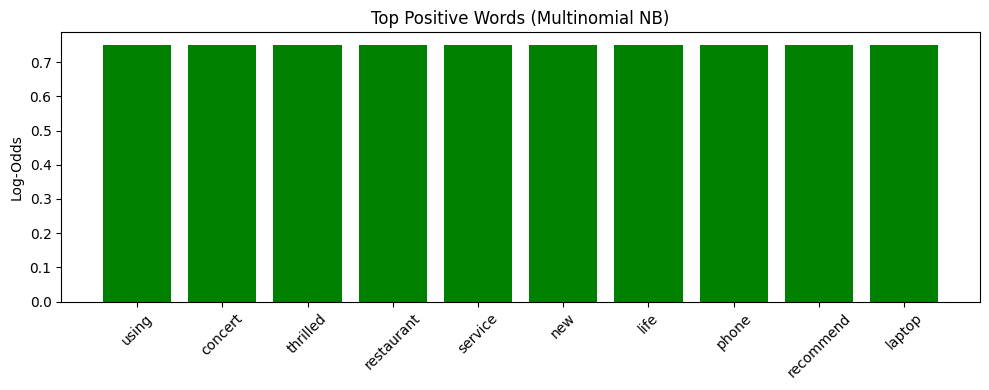

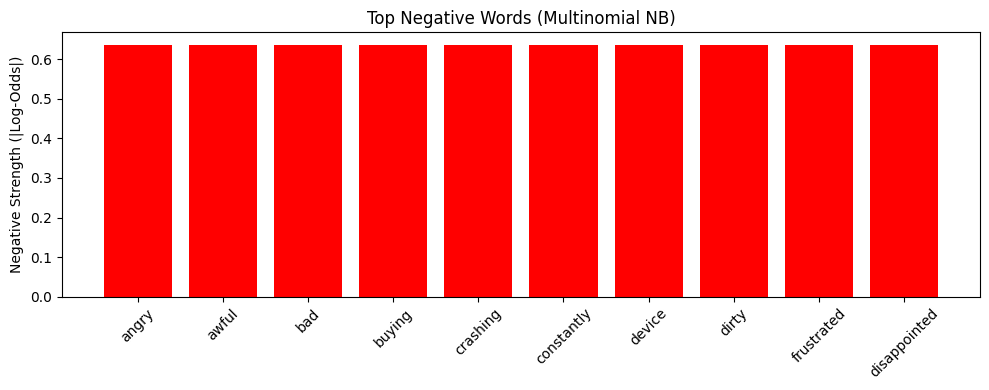

In [6]:
classes = mnb.classes_
neg_idx = list(classes).index("negative")
pos_idx = list(classes).index("positive")

log_prob_neg = mnb.feature_log_prob_[neg_idx]
log_prob_pos = mnb.feature_log_prob_[pos_idx]
log_odds = log_prob_pos - log_prob_neg

features = np.array(vectorizer.get_feature_names_out())
TOP_N = 10

# Positive
top_pos_idx = np.argsort(log_odds)[-TOP_N:][::-1]
top_pos_words = features[top_pos_idx]
top_pos_scores = log_odds[top_pos_idx]

# Negative
top_neg_idx = np.argsort(log_odds)[:TOP_N]
top_neg_words = features[top_neg_idx]
top_neg_scores = log_odds[top_neg_idx]

# Plot Positive Words
plt.figure(figsize=(10,4))
plt.bar(top_pos_words, top_pos_scores, color='green')
plt.title("Top Positive Words (Multinomial NB)")
plt.ylabel("Log-Odds")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Negative Words
plt.figure(figsize=(10,4))
plt.bar(top_neg_words, -top_neg_scores, color='red')
plt.title("Top Negative Words (Multinomial NB)")
plt.ylabel("Negative Strength (|Log-Odds|)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
vectorizer_bin = CountVectorizer(binary=True, stop_words="english")
X_bin = vectorizer_bin.fit_transform(df["clean"])

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bin, y, test_size=0.3, random_state=42)

bnb = BernoulliNB()
bnb.fit(X_train_b, y_train_b)
y_pred_bnb = bnb.predict(X_test_b)
acc_bnb = accuracy_score(y_test_b, y_pred_bnb)

print("\n=== BernoulliNB ===")
print("Accuracy:", acc_bnb)


=== BernoulliNB ===
Accuracy: 0.3333333333333333


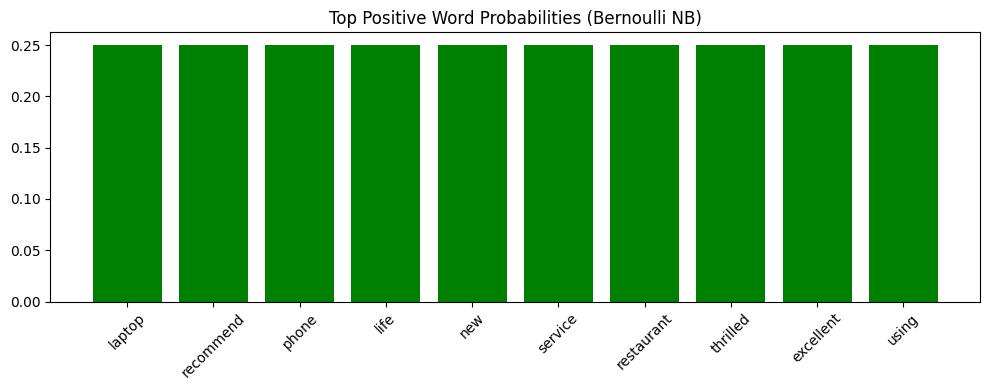

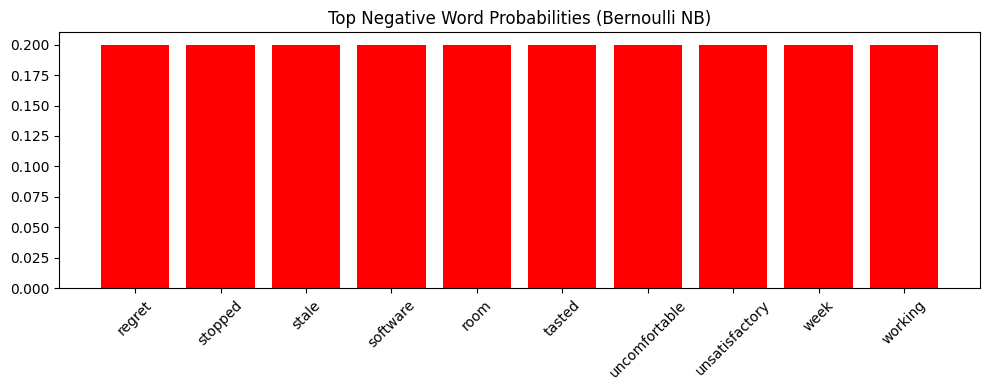

In [8]:
feature_names = vectorizer_bin.get_feature_names_out()
prob_neg = np.exp(bnb.feature_log_prob_[0])
prob_pos = np.exp(bnb.feature_log_prob_[1])

# Top Positive Words
top_pos_idx_b = prob_pos.argsort()[-10:]
plt.figure(figsize=(10,4))
plt.bar([feature_names[i] for i in top_pos_idx_b], prob_pos[top_pos_idx_b], color='green')
plt.title("Top Positive Word Probabilities (Bernoulli NB)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top Negative Words
top_neg_idx_b = prob_neg.argsort()[-10:]
plt.figure(figsize=(10,4))
plt.bar([feature_names[i] for i in top_neg_idx_b], prob_neg[top_neg_idx_b], color='red')
plt.title("Top Negative Word Probabilities (Bernoulli NB)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()